domain shift + distribution shift

/Users/saeah/dl_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


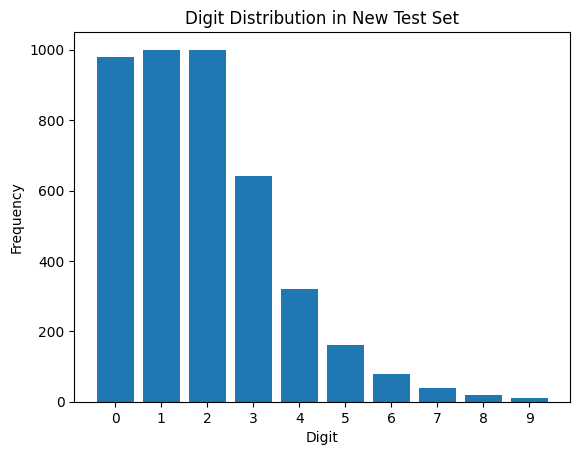

2025-02-28 13:49:00.238873: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-02-28 13:49:00.238888: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-28 13:49:00.238891: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1740779340.239190 6692208 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1740779340.239359 6692208 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,608,204 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2 (12.00 B)

2025-02-28 13:49:01.926520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


133/133 ━━━━━━━━━━━━━━━━━━━━ 29s 212ms/step - accuracy: 0.0518 - loss: 6.1286
New Test Loss: 6.4058, New Test Accuracy: 4.38%


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Define the new distribution
digit_counts = {9: 10, 8: 20, 7: 40, 6: 80, 5: 160, 4: 320, 3: 640, 2: 1000, 1: 1000, 0: 1000}

# Select the specified number of images for each digit
new_x_test, new_y_test = [], []

for digit, count in digit_counts.items():
    indices = np.where(y_test == digit)[0][:count]  # Get required samples for each digit
    new_x_test.append(x_test[indices])
    new_y_test.append(y_test[indices])

# Convert to NumPy arrays
new_x_test = np.concatenate(new_x_test, axis=0)
new_y_test = np.concatenate(new_y_test, axis=0)

# Visualize the distribution of digits in the new test set
plt.hist(new_y_test, bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Digit Distribution in New Test Set")
plt.show()

# Preprocess images (normalize, resize, convert to RGB)
def preprocess_data(x):
    x = x / 255.0  # Normalize
    x = np.expand_dims(x, axis=-1)  # Add channel dimension
    x = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x))  # Convert grayscale to RGB
    x = tf.image.resize(x, [224, 224])  # Resize to 224x224
    return x 

new_x_test = preprocess_data(new_x_test)


import os
from tensorflow.keras.models import load_model

# Get the base directory
base_dir = os.path.expanduser("/Users/saeah/Desktop/CS540 Deep Learning")

# Load the model dynamically
model_path = os.path.join(base_dir, "Programming Assignment 3", "mnist_resnet50_model_hw3_part1.h5")
model = load_model(model_path)

model.summary()

# Convert labels to categorical (one-hot encoding)
new_y_test = tf.keras.utils.to_categorical(new_y_test, num_classes=10)

# Evaluate on the new test dataset
test_loss, test_accuracy = model.evaluate(new_x_test, new_y_test, verbose=1)

# Print the results
print(f"New Test Loss: {test_loss:.4f}, New Test Accuracy: {test_accuracy * 100:.2f}%")

133/133 ━━━━━━━━━━━━━━━━━━━━ 30s 216ms/step


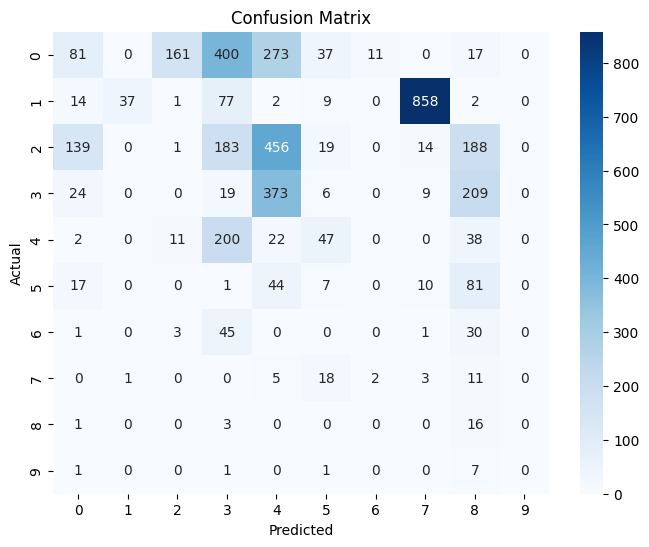

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(new_x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(new_y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

I wanted to check only with distribution shift (no domain shift)

x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


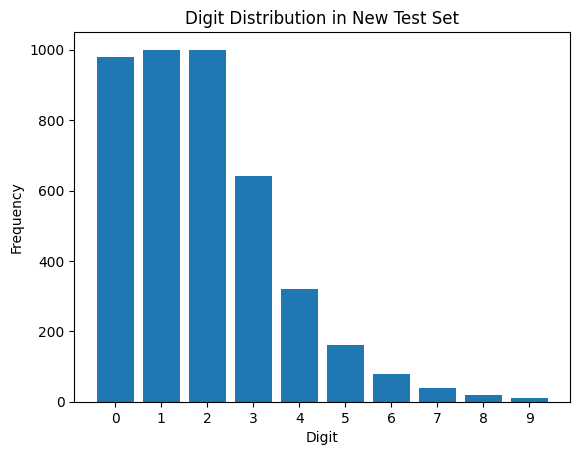

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,608,204 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2 (12.00 B)

133/133 ━━━━━━━━━━━━━━━━━━━━ 30s 213ms/step - accuracy: 0.8086 - loss: 0.5448
New Test Loss: 0.4308, New Test Accuracy: 85.81%


In [3]:
# test with modified MNIST I saved in previous homework (HW3), instead of original MNIST

import numpy as np

# Load the modified MNIST dataset
data = np.load('/Users/saeah/Desktop/CS540 Deep Learning/Programming Assignment 3/modified_mnist.npz')

# Extract train and test data
x_train = data['train_images']
y_train = data['train_labels']
x_test = data['test_images']
y_test = data['test_labels']

# Verify the shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


# Define the new distribution
digit_counts = {9: 10, 8: 20, 7: 40, 6: 80, 5: 160, 4: 320, 3: 640, 2: 1000, 1: 1000, 0: 1000}

# Select the specified number of images for each digit
new_x_test, new_y_test = [], []

for digit, count in digit_counts.items():
    indices = np.where(y_test == digit)[0][:count]  # Get required samples for each digit
    new_x_test.append(x_test[indices])
    new_y_test.append(y_test[indices])

# Convert to NumPy arrays
new_x_test = np.concatenate(new_x_test, axis=0)
new_y_test = np.concatenate(new_y_test, axis=0)

# Visualize the distribution of digits in the new test set
plt.hist(new_y_test, bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Digit Distribution in New Test Set")
plt.show()

# Preprocess images (normalize, resize, convert to RGB)
def preprocess_data(x):
    x = x / 255.0  # Normalize
    x = np.expand_dims(x, axis=-1)  # Add channel dimension
    x = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x))  # Convert grayscale to RGB
    x = tf.image.resize(x, [224, 224])  # Resize to 224x224
    return x 

new_x_test = preprocess_data(new_x_test)

import os
from tensorflow.keras.models import load_model

# Get the base directory
base_dir = os.path.expanduser("/Users/saeah/Desktop/CS540 Deep Learning")

# Load the model dynamically
model_path = os.path.join(base_dir, "Programming Assignment 3", "mnist_resnet50_model_hw3_part1.h5")
model = load_model(model_path)


model.summary()


# Convert labels to categorical (one-hot encoding)
new_y_test = tf.keras.utils.to_categorical(new_y_test, num_classes=10)

# Evaluate on the new test dataset
test_loss, test_accuracy = model.evaluate(new_x_test, new_y_test, verbose=1)

# Print the results
print(f"New Test Loss: {test_loss:.4f}, New Test Accuracy: {test_accuracy * 100:.2f}%")

133/133 ━━━━━━━━━━━━━━━━━━━━ 30s 216ms/step


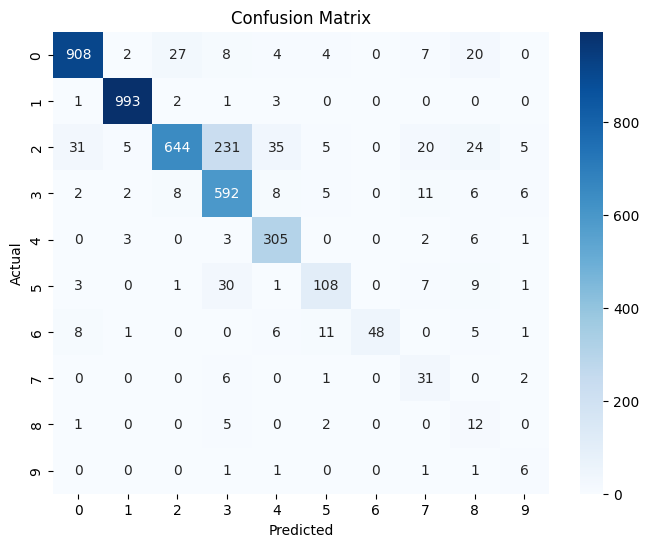

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(new_x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(new_y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [5]:
import os
print(os.getcwd())  # Prints the current directory

/Users/saeah/Desktop/CS540 Deep Learning


Experiment with different distribution shift

x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


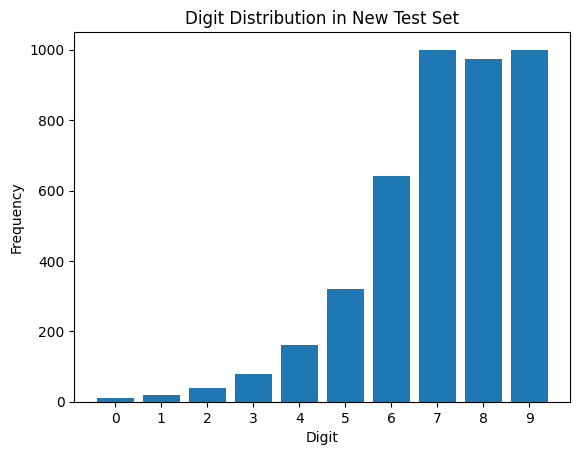

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,608,204 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2 (12.00 B)

133/133 ━━━━━━━━━━━━━━━━━━━━ 30s 214ms/step - accuracy: 0.7632 - loss: 0.7172
New Test Loss: 0.7797, New Test Accuracy: 73.66%


In [9]:
# test with modified MNIST I saved in previous homework (HW3), instead of original MNIST

import numpy as np

# Load the modified MNIST dataset
data = np.load('/Users/saeah/Desktop/CS540 Deep Learning/Programming Assignment 3/modified_mnist.npz')

# Extract train and test data
x_train = data['train_images']
y_train = data['train_labels']
x_test = data['test_images']
y_test = data['test_labels']

# Verify the shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


# Define the new distribution
digit_counts = {0: 10, 1: 20, 2: 40, 3: 80, 4: 160, 5: 320, 6: 640, 7: 1000, 8: 1000, 9: 1000}

# Select the specified number of images for each digit
new_x_test, new_y_test = [], []

for digit, count in digit_counts.items():
    indices = np.where(y_test == digit)[0][:count]  # Get required samples for each digit
    new_x_test.append(x_test[indices])
    new_y_test.append(y_test[indices])

# Convert to NumPy arrays
new_x_test = np.concatenate(new_x_test, axis=0)
new_y_test = np.concatenate(new_y_test, axis=0)

# Visualize the distribution of digits in the new test set
plt.hist(new_y_test, bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Digit Distribution in New Test Set")
plt.show()

# Preprocess images (normalize, resize, convert to RGB)
def preprocess_data(x):
    x = x / 255.0  # Normalize
    x = np.expand_dims(x, axis=-1)  # Add channel dimension
    x = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x))  # Convert grayscale to RGB
    x = tf.image.resize(x, [224, 224])  # Resize to 224x224
    return x 

new_x_test = preprocess_data(new_x_test)

import os
from tensorflow.keras.models import load_model

# Get the base directory
base_dir = os.path.expanduser("/Users/saeah/Desktop/CS540 Deep Learning")

# Load the model dynamically
model_path = os.path.join(base_dir, "Programming Assignment 3", "mnist_resnet50_model_hw3_part1.h5")
model = load_model(model_path)


model.summary()


# Convert labels to categorical (one-hot encoding)
new_y_test = tf.keras.utils.to_categorical(new_y_test, num_classes=10)

# Evaluate on the new test dataset
test_loss, test_accuracy = model.evaluate(new_x_test, new_y_test, verbose=1)

# Print the results
print(f"New Test Loss: {test_loss:.4f}, New Test Accuracy: {test_accuracy * 100:.2f}%")

133/133 ━━━━━━━━━━━━━━━━━━━━ 30s 219ms/step


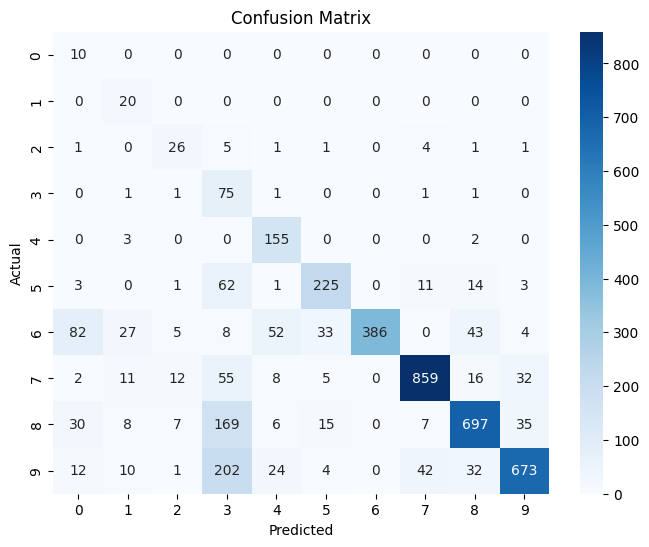

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(new_x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(new_y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()